### Problem Statment
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential lead

### 1. Import Libraries

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
lead_score = pd.read_csv('Leads.csv')

In [3]:
#Check the imported data
lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#checking shape of dataset
lead_score.shape

(9240, 37)

In [5]:
#Checking column info of dataset
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Observations:1. Some columns contains null values
2. Some columns needs a change in datatype

### 2. Data Cleaning

In [6]:
#Checking "Select" value in different columns
lead_score['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [7]:
#Handling "Select" value in different columns
lead_score = lead_score.replace('Select', np.nan)

In [8]:
#Check for Null values
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
#Check for the Null percentages of different columns
round(lead_score.isnull().sum() / len(lead_score.index),2) * 100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
# Drop all the column having missing values greater than 30%
for cols in lead_score.columns:
    #print(cols)
    if round(lead_score[cols].isnull().sum() / len(lead_score.index),2)*100 > 30:
        lead_score.drop(cols, 1, inplace = True)

In [11]:
#Again check for the null values
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [12]:
#imputing lead source column
lead_score['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [13]:
#Replace google with Google
lead_score['Lead Source'] = lead_score['Lead Source'].replace('google', 'Google')
lead_score['Lead Source'] = lead_score['Lead Source'].replace(np.nan, 'Google')

In [14]:
lead_score['Lead Source'] .value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [15]:
lead_score.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [16]:
#Replace null values in Country cal
lead_score.Country = lead_score.Country.replace(np.nan, 'India')

In [17]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [18]:
lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
#Replace null values in 'What is your current occupation' column
lead_score['What is your current occupation'] = lead_score['What is your current occupation'].replace(np.nan, 'Unemployed')

In [20]:
lead_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                             0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [21]:
#Replace null in 'What matters most to you in choosing a course'
lead_score['What matters most to you in choosing a course'] = lead_score['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [22]:
lead_score.isnull().sum()

Prospect ID                                        0
Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                     

In [23]:
round(lead_score.isnull().sum() / len(lead_score.index),2) * 100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    1.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [24]:
#Dropping rows with less than 1%
lead_score.dropna(inplace = True)

In [25]:
round(lead_score.isnull().sum() / len(lead_score.index),2) * 100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

In [26]:
#Dropping some columns that are not required
cols_to_drop = ['Prospect ID','Lead Number','Country','Receive More Updates About Our Courses', 
                'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
               'Last Notable Activity']

In [27]:
lead_score.drop(cols_to_drop, axis=1, inplace=True)

In [28]:
lead_score.shape

(9103, 19)

In [29]:
lead_score['A free copy of Mastering The Interview'].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [30]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   What is your current occupation                9103 

In [31]:
#Categorical columns
cat_col = ['Lead Source','Do Not Email','Do Not Call','What is your current occupation','Last Activity',
           'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums',
           'Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

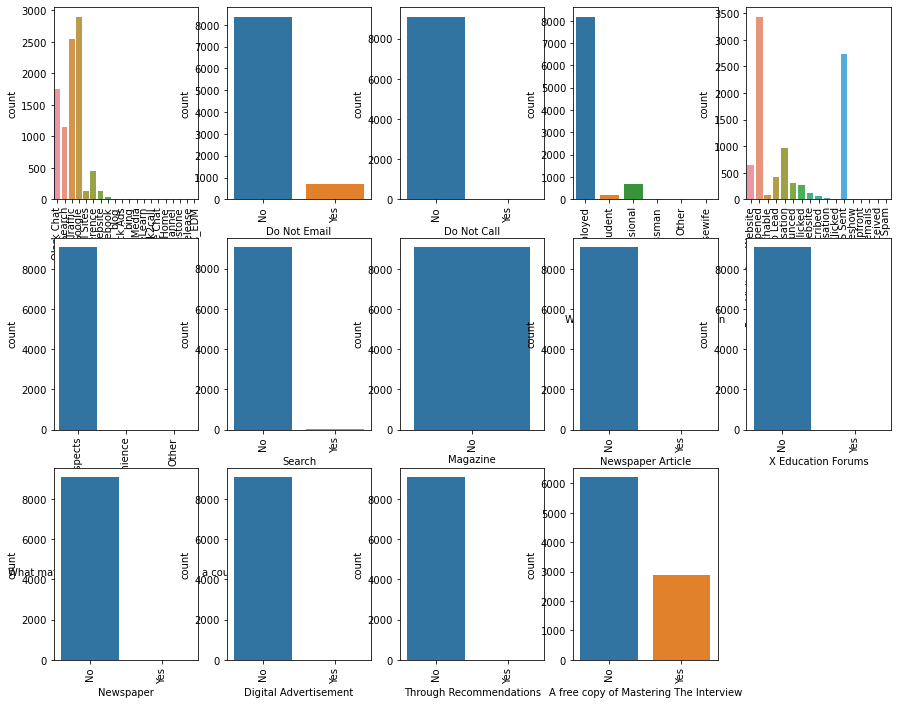

In [32]:
#Check the data Skewness of the columns
import seaborn as sns
fig = plt.figure(figsize = (15,12))
i = 1
for col in cat_col:
    plt.subplot(3,5, i)
    sns.countplot(lead_score[col])
    plt.xticks(rotation=90)
    i = i+1
plt.show()

The columns 'Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations' are skwed highly

In [33]:
drop_cols = [ 'Do Not Call','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
             'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

lead_score.drop(drop_cols, axis=1, inplace=True)

In [34]:
lead_score.shape

(9103, 10)

In [35]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


##### Univariate Analysis

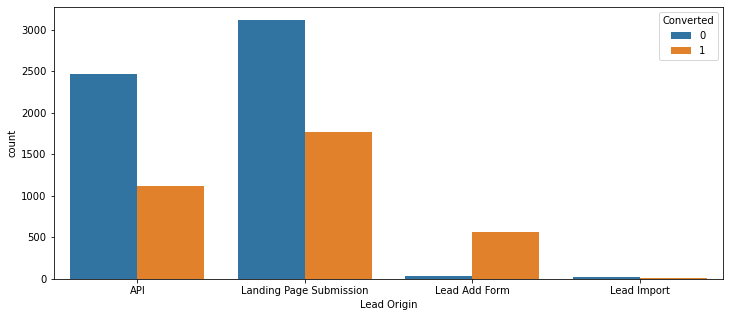

In [36]:
#Plot countplot for Lead Origin vs Converted
plt.figure(figsize=(12, 5))
ax = sns.countplot(x = 'Lead Origin', hue = lead_score.Converted, data=lead_score)
plt.show()

Convertion from Landing page submission is high, But Lead Add From has more conversion rate

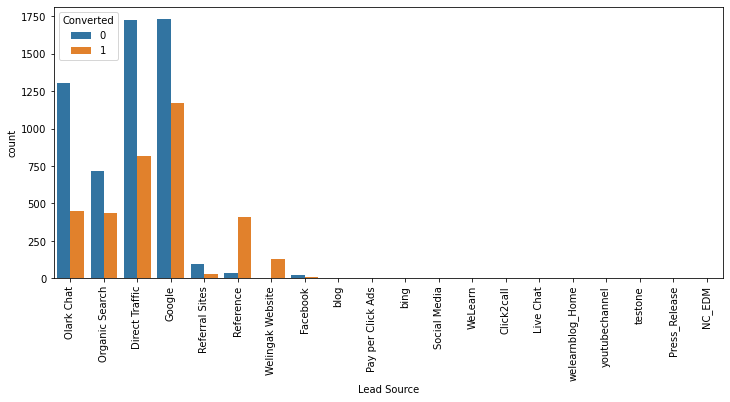

In [37]:
#Plot countplot for Lead Source vs Converted
plt.figure(figsize=(12, 5))
ax = sns.countplot(x = 'Lead Source', hue = lead_score.Converted, data=lead_score)
plt.xticks(rotation=90)
plt.show()

1. Conversion is high for both Direct Traffice and Google but also non conversion is very high compared to conversion
2. Reference has high conversion compared to non conversion

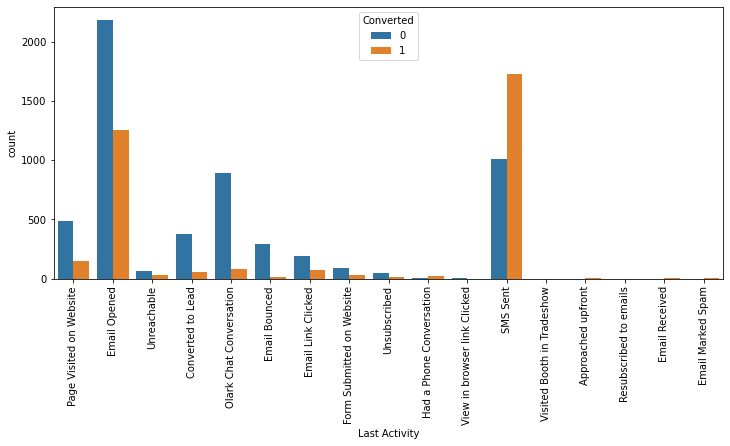

In [38]:
#Plot countplot for Last Activity vs Converted
plt.figure(figsize=(12, 5))
ax = sns.countplot(x = 'Last Activity', hue = lead_score.Converted, data=lead_score)
plt.xticks(rotation=90)
plt.show()

SMS sent has highest conversion

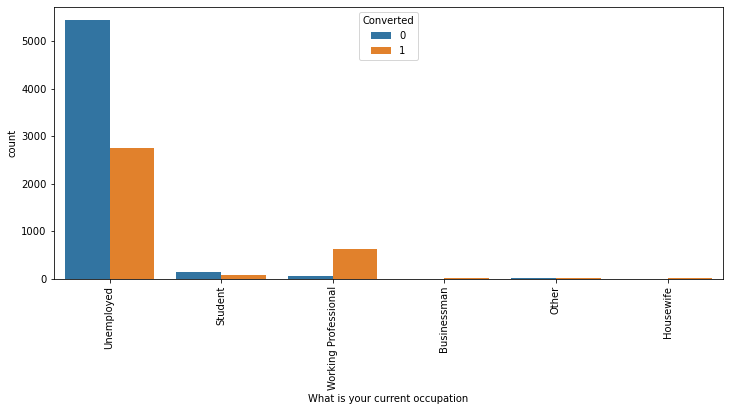

In [39]:
#Plot countplot for 'What is your current occupation' vs Converted
plt.figure(figsize=(12, 5))
ax = sns.countplot(x = 'What is your current occupation', hue = lead_score.Converted, data=lead_score)
plt.xticks(rotation=90)
plt.show()

Unemplyed conversion is High, But conversion rate of working professional is high compared to non conversion



#####  Outlier Analysis/Treatment

In [40]:
numeric_col = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

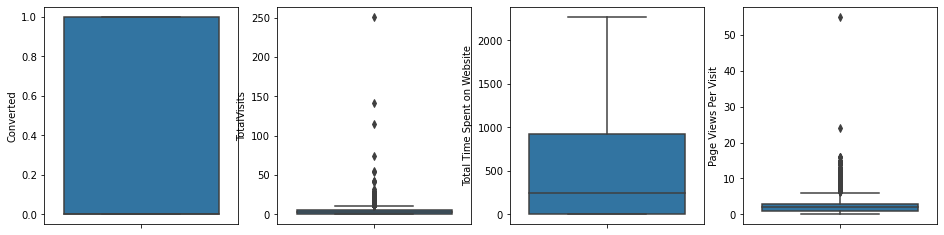

In [41]:
#Check the outliers of the columns
import seaborn as sns
fig = plt.figure(figsize = (16,4))
i = 1
for col in numeric_col:
    plt.subplot(1,4, i)
    sns.boxplot(y=lead_score[col])
    i = i+1

In [42]:
outlier_col = ['TotalVisits','Page Views Per Visit']
len(outlier_col)

2

Outliers are observed in Totla visits and Page Views per Visit

In [43]:
#Total visits outlier treatment
#outlier_col = ['TotalVisits','Page Views Per Visit']
#for i in range(i, len(outlier_col)):
total_visits_quantile = lead_score['TotalVisits'].quantile(0.95)
lead_score = lead_score[lead_score['TotalVisits'] < total_visits_quantile]

In [44]:
total_visits_quantile = lead_score['Page Views Per Visit'].quantile(0.95)
lead_score = lead_score[lead_score['Page Views Per Visit'] < total_visits_quantile]

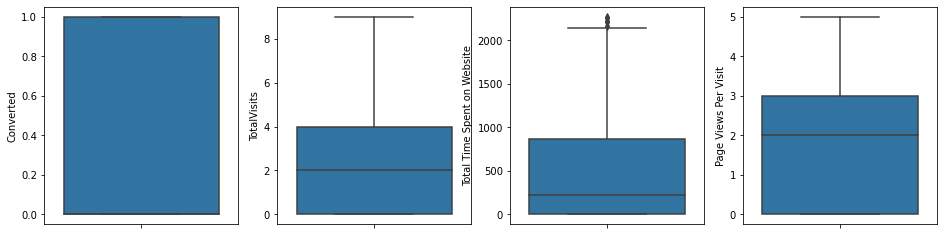

In [45]:
#Check the outliers of the columns
import seaborn as sns
fig = plt.figure(figsize = (16,4))
i = 1
for col in numeric_col:
    plt.subplot(1,4, i)
    sns.boxplot(y=lead_score[col])
    i = i+1

In [46]:
lead_score.shape

(8153, 10)

In [47]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No


### 3. Data Preparation

In [48]:
#Converting some binary variables (Yes/No) to 0/1
binary_list =  ['Do Not Email','A free copy of Mastering The Interview']

# Defining the map function
def binary_mapping(x):
    return x.map({'Yes': 1, "No": 0})

lead_score[binary_list] = lead_score[binary_list].apply(binary_mapping)

In [49]:
lead_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0


In [50]:
lead_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8153 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8153 non-null   object 
 1   Lead Source                             8153 non-null   object 
 2   Do Not Email                            8153 non-null   int64  
 3   Converted                               8153 non-null   int64  
 4   TotalVisits                             8153 non-null   float64
 5   Total Time Spent on Website             8153 non-null   int64  
 6   Page Views Per Visit                    8153 non-null   float64
 7   Last Activity                           8153 non-null   object 
 8   What is your current occupation         8153 non-null   object 
 9   A free copy of Mastering The Interview  8153 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 700.6+ KB


In [51]:
#Creation of dummy variables
cols_to_dummy = lead_score.select_dtypes(include=['object']).columns
cols_to_dummy

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation'],
      dtype='object')

In [52]:
# Creating dummy variables for the variable 'Lead Origin'
get_dummy = pd.get_dummies(lead_score['Lead Origin'], prefix='Lead Origin')
get_dummy = get_dummy.drop(['Lead Origin_Lead Import'], 1)
lead_score = pd.concat([lead_score, get_dummy], axis=1)

In [53]:
# Creating dummy variables for the variable 'Lead Source'
get_dummy = pd.get_dummies(lead_score['Lead Source'], prefix='Lead Source')
get_dummy = get_dummy.drop(['Lead Source_blog'], 1)
lead_score = pd.concat([lead_score, get_dummy], axis=1)

# Creating dummy variables for the variable 'Last Activity'
get_dummy = pd.get_dummies(lead_score['Last Activity'], prefix='Last Activity')
get_dummy = get_dummy.drop(['Last Activity_Unsubscribed'], 1)
lead_score = pd.concat([lead_score, get_dummy], axis=1)

# Creating dummy variables for the variable ''What is your current occupation'
get_dummy = pd.get_dummies(lead_score['What is your current occupation'], prefix='What is your current occupation')
get_dummy = get_dummy.drop(['What is your current occupation_Other'], 1)
lead_score = pd.concat([lead_score, get_dummy], axis=1)

In [54]:
#Drop columns for that dummy columns was created
lead_score.drop(cols_to_dummy,axis=1, inplace=True)

In [55]:
lead_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,...,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


### 4. Test Train Split

In [56]:
#import train test split
from sklearn.model_selection import train_test_split

In [57]:
#Putting feature variable to X
X = lead_score.drop('Converted', axis=1)

#Putting response variable to y
y = lead_score['Converted']

In [58]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
X_train.shape

(5707, 47)

In [60]:
y_train.shape

(5707,)

### 5. Feature Scaling

In [61]:
#import StandardScaler lib
from sklearn.preprocessing import StandardScaler

In [62]:
#Standard scaler for scaling features
scaler = StandardScaler()

numeric_col = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])

In [63]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,...,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
2294,-0.288319,-0.260647,-0.404269,0.034154,-0.650532,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6004,-0.288319,-0.260647,-0.126682,0.034154,1.537203,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
8845,-0.288319,-0.260647,-0.128533,0.034154,-0.650532,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2218,-0.288319,0.202752,-0.313591,0.686142,1.537203,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8275,-0.288319,-0.260647,-0.776235,0.034154,1.537203,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [64]:
#Checking the conversion rate
converstion_rate = round(sum(lead_score['Converted'])/len(lead_score['Converted']) * 100,2)
converstion_rate

37.64

### 6. Looking at Correlations

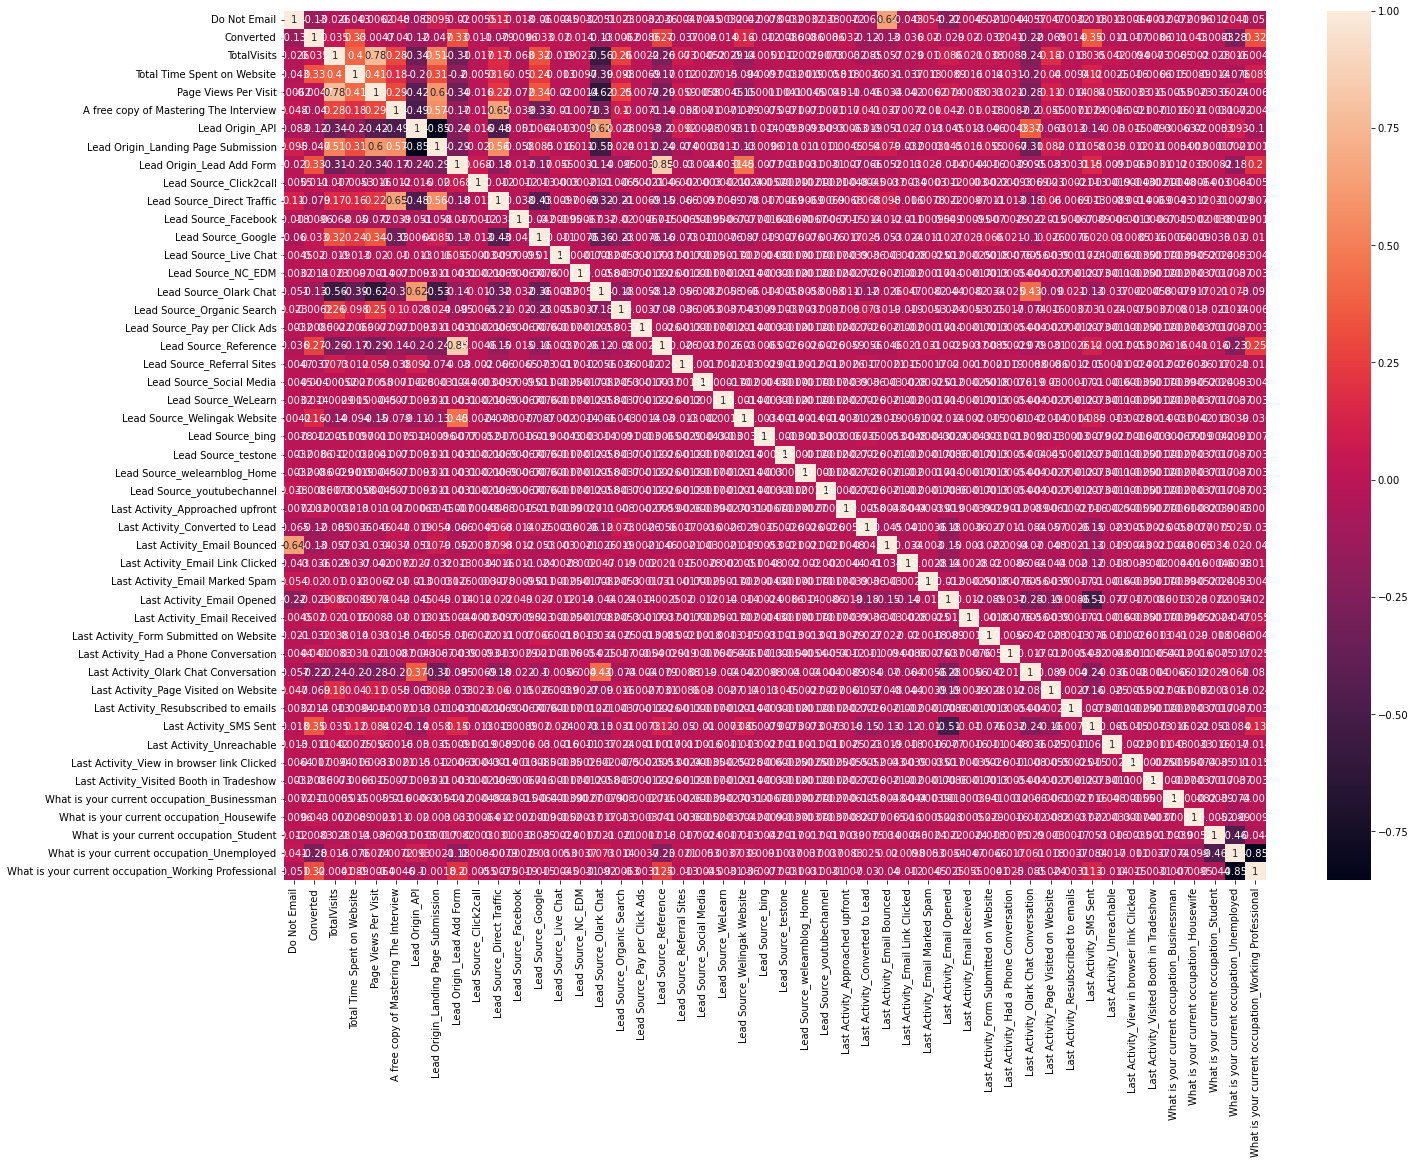

In [65]:
#Checking the correlation matrix 
plt.figure(figsize = (22,16)) 
sns.heatmap(lead_score.corr(),annot = True)
plt.show()

Lead Source_Reference and Lead Origin_Lead Add Form are hihgly correlated

In [66]:
X_train = X_train.drop(['Lead Source_Reference', 'Lead Origin_Lead Add Form'], axis=1)
X_test = X_test.drop(['Lead Source_Reference', 'Lead Origin_Lead Add Form'], axis=1)

### 7. Model Building

##### Feature selection - RFE

In [67]:
#import logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [68]:
#import RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [69]:
ref_cols = X_train.columns[rfe.support_]
ref_cols

Index(['Total Time Spent on Website', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Approached upfront', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional'],
      dtype='object')

##### Model1

In [70]:
#import stats model
import statsmodels.api as sm

In [71]:
X_train_sm = sm.add_constant(X_train[ref_cols])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5707
Model:                            GLM   Df Residuals:                     5691
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2433.3
Date:                Wed, 15 Mar 2023   Deviance:                       4866.6
Time:                        17:19:30   Pearson chi2:                 5.68e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3779
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5112      0.226     11.095      0.000       2.068       2.955
Total Time Spent on Website                              0.9607      0.038     25.291      0.000       0.886       1.035
Lead Origin_API                                         -3.3254      0.233    -14.259      0.000      -3.783      -2.868
Lead Origin_Landing Page Submission                     -3.8605      0.239    -16.123      0.000      -4.330      -3.391
Lead Source_Direct Traffic                              -0.4594      0.097     -4.732      0.000      -0.650      -0.269
Lead Source_Facebook                                    -2.9097      0.605     -4.809      0.000      -4.095      -1.724
Lead Source_Organic Search                              -0.4684      0.118     -3.979      0.000      -0.699      -0.238
Lead Source_Referral Sites                              -0.8208      0.349     -2.353      0.019      -1.505      -0.137
Lead Source_Welingak Website                             2.2773      1.043      2.183      0.029       0.233       4.322
Last Activity_Approached upfront                        23.1902   2.25e+04      0.001      0.999   -4.41e+04    4.42e+04
Last Activity_Email Bounced                             -2.1307      0.377     -5.658      0.000      -2.869      -1.393
Last Activity_Had a Phone Conversation                   2.0265      0.741      2.734      0.006       0.574       3.479
Last Activity_Olark Chat Conversation                   -1.3784      0.170     -8.112      0.000      -1.711      -1.045
Last Activity_SMS Sent                                   1.4020      0.077     18.153      0.000       1.251       1.553
What is your current occupation_Housewife               23.5502   1.79e+04      0.001      0.999   -3.51e+04    3.52e+04
What is your current occupation_Working Professional     2.6686      0.193     13.837      0.000       2.291       3.047
========================================================================================================================
"""

Last Activity_Approached upfront has high p value(0.999) greater than threshold value (0.05). We can remove this column

In [72]:
#Drop column with high p value
ref_cols = ref_cols.drop('Last Activity_Approached upfront')

##### Model2

In [73]:
X_train_sm = sm.add_constant(X_train[ref_cols])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5707
Model:                            GLM   Df Residuals:                     5692
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2437.4
Date:                Wed, 15 Mar 2023   Deviance:                       4874.7
Time:                        17:19:30   Pearson chi2:                 5.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3770
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5139      0.226     11.108      0.000       2.070       2.957
Total Time Spent on Website                              0.9622      0.038     25.348      0.000       0.888       1.037
Lead Origin_API                                         -3.3236      0.233    -14.254      0.000      -3.781      -2.867
Lead Origin_Landing Page Submission                     -3.8596      0.239    -16.122      0.000      -4.329      -3.390
Lead Source_Direct Traffic                              -0.4570      0.097     -4.712      0.000      -0.647      -0.267
Lead Source_Facebook                                    -2.9095      0.605     -4.811      0.000      -4.095      -1.724
Lead Source_Organic Search                              -0.4635      0.118     -3.943      0.000      -0.694      -0.233
Lead Source_Referral Sites                              -0.8243      0.349     -2.363      0.018      -1.508      -0.140
Lead Source_Welingak Website                             2.2783      1.043      2.184      0.029       0.234       4.323
Last Activity_Email Bounced                             -2.1365      0.377     -5.674      0.000      -2.875      -1.399
Last Activity_Had a Phone Conversation                   2.0209      0.741      2.726      0.006       0.568       3.474
Last Activity_Olark Chat Conversation                   -1.3829      0.170     -8.138      0.000      -1.716      -1.050
Last Activity_SMS Sent                                   1.3966      0.077     18.096      0.000       1.245       1.548
What is your current occupation_Housewife               23.5439   1.79e+04      0.001      0.999   -3.52e+04    3.52e+04
What is your current occupation_Working Professional     2.6649      0.193     13.818      0.000       2.287       3.043
========================================================================================================================
"""

What is your current occupation_Housewife has high p value(0.999) greater than threshold value (0.05). We can remove this column

In [74]:
#Drop column with high p value
ref_cols = ref_cols.drop('What is your current occupation_Housewife')

##### Model3

In [75]:
X_train_sm = sm.add_constant(X_train[ref_cols])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5707
Model:                            GLM   Df Residuals:                     5693
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2442.9
Date:                Wed, 15 Mar 2023   Deviance:                       4885.9
Time:                        17:19:30   Pearson chi2:                 5.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.5296      0.226     11.188      0.000       2.086       2.973
Total Time Spent on Website                              0.9602      0.038     25.327      0.000       0.886       1.035
Lead Origin_API                                         -3.3381      0.233    -14.328      0.000      -3.795      -2.881
Lead Origin_Landing Page Submission                     -3.8659      0.239    -16.165      0.000      -4.335      -3.397
Lead Source_Direct Traffic                              -0.4585      0.097     -4.735      0.000      -0.648      -0.269
Lead Source_Facebook                                    -2.9246      0.604     -4.839      0.000      -4.109      -1.740
Lead Source_Organic Search                              -0.4544      0.117     -3.874      0.000      -0.684      -0.224
Lead Source_Referral Sites                              -0.8243      0.349     -2.364      0.018      -1.508      -0.141
Lead Source_Welingak Website                             2.2636      1.043      2.170      0.030       0.219       4.308
Last Activity_Email Bounced                             -2.1413      0.376     -5.689      0.000      -2.879      -1.404
Last Activity_Had a Phone Conversation                   2.0109      0.741      2.714      0.007       0.559       3.463
Last Activity_Olark Chat Conversation                   -1.3852      0.170     -8.155      0.000      -1.718      -1.052
Last Activity_SMS Sent                                   1.3895      0.077     18.027      0.000       1.238       1.541
What is your current occupation_Working Professional     2.6596      0.193     13.795      0.000       2.282       3.037
========================================================================================================================
"""

In [76]:
#Drop column with high p value
ref_cols = ref_cols.drop('Lead Source_Welingak Website')

##### Model 4

In [77]:
X_train_sm = sm.add_constant(X_train[ref_cols])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5707
Model:                            GLM   Df Residuals:                     5694
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2447.4
Date:                Wed, 15 Mar 2023   Deviance:                       4894.9
Time:                        17:19:31   Pearson chi2:                 5.66e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3748
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.8156      0.219     12.831      0.000       2.386       3.246
Total Time Spent on Website                              0.9602      0.038     25.330      0.000       0.886       1.034
Lead Origin_API                                         -3.6263      0.226    -16.033      0.000      -4.070      -3.183
Lead Origin_Landing Page Submission                     -4.1535      0.233    -17.854      0.000      -4.609      -3.698
Lead Source_Direct Traffic                              -0.4588      0.097     -4.739      0.000      -0.649      -0.269
Lead Source_Facebook                                    -3.2109      0.602     -5.335      0.000      -4.391      -2.031
Lead Source_Organic Search                              -0.4544      0.117     -3.875      0.000      -0.684      -0.225
Lead Source_Referral Sites                              -0.8233      0.349     -2.362      0.018      -1.507      -0.140
Last Activity_Email Bounced                             -2.0856      0.365     -5.709      0.000      -2.802      -1.370
Last Activity_Had a Phone Conversation                   2.0097      0.742      2.709      0.007       0.556       3.463
Last Activity_Olark Chat Conversation                   -1.3781      0.169     -8.139      0.000      -1.710      -1.046
Last Activity_SMS Sent                                   1.3929      0.077     18.080      0.000       1.242       1.544
What is your current occupation_Working Professional     2.6526      0.193     13.751      0.000       2.274       3.031
========================================================================================================================
"""

In [78]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
#Check VIF
vif = pd.DataFrame()
vif['Features'] = X_train[ref_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[ref_cols].values, i) for i in range(X_train[ref_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.72
3,Lead Source_Direct Traffic,2.22
1,Lead Origin_API,1.65
10,Last Activity_SMS Sent,1.46
9,Last Activity_Olark Chat Conversation,1.40
5,Lead Source_Organic Search,1.25
0,Total Time Spent on Website,1.11
11,What is your current occupation_Working Profes...,1.09
7,Last Activity_Email Bounced,1.08
6,Lead Source_Referral Sites,1.03


1. All Variables have P value < 0.05
2. Also VIF of all variables are less than 5
-We can proceed with this model for making predictions

In [80]:
#Predict values on train data set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred

array([0.07063631, 0.37158855, 0.18827146, ..., 0.13619838, 0.98630923,
       0.04711233])

In [81]:
y_train_pred[:10]

array([0.07063631, 0.37158855, 0.18827146, 0.1097399 , 0.24065446,
       0.07491284, 0.14068323, 0.98895649, 0.07201053, 0.08384615])

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.070636,2294
1,0,0.371589,6004
2,0,0.188271,8845
3,0,0.109740,2218
4,0,0.240654,8275


In [83]:
# Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.070636,2294,0
1,0,0.371589,6004,0
2,0,0.188271,8845,0
3,0,0.109740,2218,0
4,0,0.240654,8275,0


In [84]:
#Confusion matrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3167  376]
 [ 786 1378]]


In [85]:
#Overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7963903977571404


#### Metrics beyond simply accuracy

In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
#Sensitivity of our logistic regression model
TP / float(TP+FN)

0.6367837338262476

In [88]:
#Calculate specificity
TN / float(TN+FP)

0.8938752469658482

In [89]:
#Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10612475303415185


In [90]:
#Positive predictive value 
print (TP / float(TP+FP))

0.7856328392246295


In [91]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8011636731596256


### 8. Plotting the ROC Curve

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [93]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

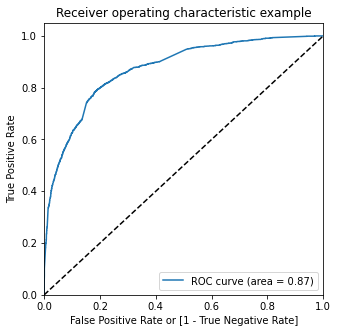

In [94]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### 9. Finding Optimal Cutoff Point

In [95]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.070636,2294,0,1,0,0,0,0,0,0,0,0,0
1,0,0.371589,6004,0,1,1,1,1,0,0,0,0,0,0
2,0,0.188271,8845,0,1,1,0,0,0,0,0,0,0,0
3,0,0.109740,2218,0,1,1,0,0,0,0,0,0,0,0
4,0,0.240654,8275,0,1,1,1,0,0,0,0,0,0,0


In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379183  1.000000  0.000000
0.1   0.1  0.567724  0.977357  0.317528
0.2   0.2  0.736814  0.886322  0.645498
0.3   0.3  0.783774  0.829020  0.756139
0.4   0.4  0.805327  0.767560  0.828394
0.5   0.5  0.796390  0.636784  0.893875
0.6   0.6  0.788856  0.563771  0.926334
0.7   0.7  0.776765  0.487985  0.953147
0.8   0.8  0.758893  0.406654  0.974033
0.9   0.9  0.707727  0.243993  0.990968


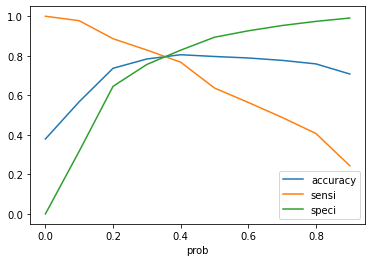

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve, we can take 0.35 as cutoff

In [98]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.070636,2294,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.371589,6004,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.188271,8845,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.109740,2218,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.240654,8275,0,1,1,1,0,0,0,0,0,0,0,0


In [99]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7993691957245488

In [100]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2830,  713],
       [ 432, 1732]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.800369685767098

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.7987581145921535

In [104]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20124188540784646


In [105]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7083844580777097


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8675659104843654


### Precision and Recall

In [107]:
from sklearn.metrics import precision_score, recall_score

In [108]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7856328392246295

In [109]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6367837338262476

### Precision and Recall Tradeoff

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5702    1
 5703    0
 5704    0
 5705    1
 5706    0
 Name: Converted, Length: 5707, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5702    0
 5703    0
 5704    0
 5705    1
 5706    0
 Name: Predicted, Length: 5707, dtype: int64)

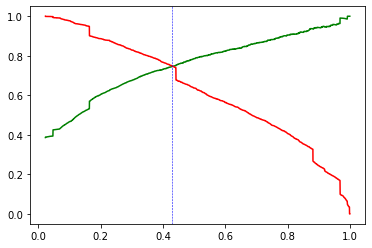

In [112]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.43, color='b',linewidth = 0.55, linestyle='--')
plt.show()

### 10. Making predictions on the Test Set


In [113]:
numeric_col = X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[numeric_col] = scaler.fit_transform(X_test[numeric_col])

X_test = X_test[ref_cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional
715,1.048970,0,1,0,0,1,0,0,0,0,0,0
6986,-0.848316,1,0,0,0,0,0,0,0,0,1,0
5126,1.624131,0,1,0,0,0,0,0,0,0,1,0
5791,-0.848316,0,0,0,0,0,0,0,0,0,1,1
6904,-0.848316,1,0,0,0,0,0,0,0,0,0,0


In [114]:
X_test_sm = sm.add_constant(X_test)

In [115]:
#Making predections on test set
y_test_pred = res.predict(X_test_sm)

In [116]:
y_test_pred[:10]

715     0.313222
6986    0.442186
5126    0.834034
5791    0.997640
6904    0.164490
6226    0.164490
2053    0.577871
4442    0.967516
8415    0.951565
7292    0.204296
dtype: float64

In [117]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
715,0.313222
6986,0.442186
5126,0.834034
5791,0.997640
6904,0.164490


In [118]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [119]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [120]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,715,0.313222
1,1,6986,0.442186
2,0,5126,0.834034
3,1,5791,0.997640
4,0,6904,0.164490


In [122]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,715,1,0.313222
1,6986,1,0.442186
2,5126,0,0.834034
3,5791,1,0.997640
4,6904,0,0.164490


In [123]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,715,1,0.313222,0
1,6986,1,0.442186,1
2,5126,0,0.834034,1
3,5791,1,0.997640,1
4,6904,0,0.164490,0


In [124]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7914963205233033

In [125]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1216,  325],
       [ 185,  720]], dtype=int64)

In [126]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [127]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7955801104972375

In [128]:
# Let us calculate specificity
TN / float(TN+FP)

0.7890979883192732

###### Assign Lead Score to Test Data

In [129]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,715,1,0.313222,0,31
1,6986,1,0.442186,1,44
2,5126,0,0.834034,1,83
3,5791,1,0.997640,1,100
4,6904,0,0.164490,0,16


Higher the Lead score, the chance of conversion is high

### Over Resluts: 

Train DataSet:
1. Accuracy    : 79.93% ≈ 80%
2. Sensitivity : 80.03% 
3. Specificity : 79.87% ≈ 80%

Test DataSet:
1. Accuracy    : 79.14%
2. Sensitivity : 79.55% ≈ 80%
3. Specificity : 78.90%

### Conclusion

1. The target lead conversion rate is around 80%
2. The Accuracy of the model is around 80%
3. Accuracy, Sensitivity and Specificity of both Test and Train have closer values

Important variables which positively contributed for lead converstions are:
1. What is your current occupation_Working Professional
2. Last Activity_Had a Phone Conversation
3. Total Time Spent on Website
4. Last Activity_SMS Sent